<a href="https://colab.research.google.com/github/LFer28/Tareas/blob/main/03%20Machine%20Learning/notebooks/03-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/03-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⭕ Práctica

Usaremos un dataset sobre publicidad. Este dataset consta de 200 registros, cada registro consta de las variables.


*   TV: dólares de publicidad gastados en TV para un solo producto en un mercado determinado (en miles de dólares)
*   Radio: inversión publicitaria en radio
*   Newspaper: inversión publicitaria en periódicos
*   Sales: ventas de un solo producto en un mercado determinado (en miles de unidades).

Objetivos:

1. Entrenar al menos dos modelo de regresión lineal (regresión lineal y uno con regularización) usando el 85% de las instancias, separar el resto para prueba. **No olvides el preprocesamiento**, **cuidado con el data leakage**.
2. Reportar las métricas de rendimiento MAE, MSE en las predicciones con el conjunto de prueba solamente.
3. Con base en la métrica de rendimiento MAE, escoge el mejor modelo de regresión lineal. Es decir, ¿cuál es el menor MAE que puedes obtener en el conjunto de prueba? Junto con este número, reporta los parámetros y la combinación de técnicas que usaste.

Recuerdas las opciones que tienes en cada uno de los pasos:

* Preprocesamiento:
    * Escalamiento: MinMaxScaler, StandardScaler.
    * Selección de features: VarianceThreshold, SelectKBest, SequentialFeatureSelector, ...
* Algoritmo de Regresión: Regresión Lineal, Regresión Lasso, Ridge, ElasticNet.

Considera las siguientes situaciones en el preprocesamiento:

* ¿Hay valores faltantes? En caso de que sí, recuerda que tienes dos opciones: remover estas instancias o hacer imputación.
* ¿Cuál es el rango de las 3 variables? ¿tienen magnitudes muy diferentes?
* ¿Hay alguna variable que consideres que no es muy relevante?
* Realiza la(s) técnica(s) de normalización que consideres necesario: selección de features, normalización.





        TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


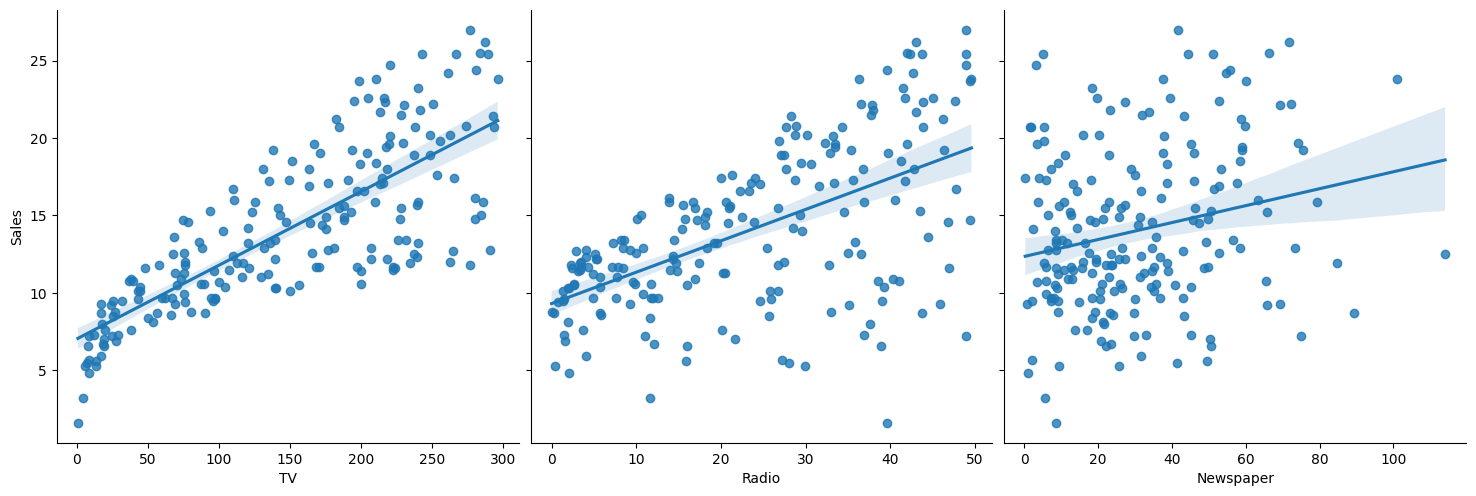

In [127]:
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/advertising.csv'
sales_df = pd.read_csv(url,index_col=0)

sns.pairplot(sales_df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1, kind='reg')

print(sales_df)

In [130]:
sales_df = sales_df.drop(index=sales_df[sales_df['TV']==0].index.tolist())
sales_df = sales_df.drop(index=sales_df[sales_df['Radio']==0].index.tolist())
sales_df = sales_df.drop(index=sales_df[sales_df['Newspaper']==0].index.tolist())
sales_df = sales_df.drop(index=sales_df[sales_df['Sales']==0].index.tolist())

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(sales_df[['Sales','TV','Newspaper','Radio']])
scaled_values

scaler2 = StandardScaler()
scaler2.fit(sales_df[['Sales','TV','Newspaper','Radio']])
scaled_values2 = scaler2.transform(sales_df[['Sales','TV','Newspaper','Radio']])
scaled_values2

sales_df.loc[:] = scaled_values2

Y = sales_df['Sales'].values

sales_df.drop(columns='Sales',inplace=True)
X_df = pd.get_dummies(sales_df,dtype=int)
X = X_df.values

Y = Y[:30]
X = X[:30,:]

In [131]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.85,random_state=2287)

#lr = Ridge(alpha=1)
#lr = Lasso(alpha=4)
#lr = ElasticNet (alpha=1,l1_ratio=0.5)
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)


print(f"R2 en el conjunto de entrenamiento: {lr.score(x_train,y_train)}")
print(f"MAE en el conjunto de prueba: {np.round(mean_absolute_error(y_test,y_pred),30)}")
print(f"MAPE en el conjunto de prueba: {np.round(mean_absolute_percentage_error(y_test,y_pred),30)}")


R2 en el conjunto de entrenamiento: 0.8044959038499939
MAE en el conjunto de prueba: 0.5047894387349814
MAPE en el conjunto de prueba: 0.7580882381448518
